# COVID Datahub - Exploratory Data Analysis

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing data

Using data from the COVID19 Datahub, administrative level 1 in `.csv` format available at https://storage.covid19datahub.io/data-1.csv

In [2]:
data1 = pd.read_csv("./data/data-1.csv")
print(data1.shape)
print(data1.columns)
data1.head()

(57721, 35)
Index(['id', 'date', 'tests', 'confirmed', 'recovered', 'deaths', 'hosp',
       'vent', 'icu', 'population', 'school_closing', 'workplace_closing',
       'cancel_events', 'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'stringency_index', 'iso_alpha_3',
       'iso_alpha_2', 'iso_numeric', 'currency', 'administrative_area_level',
       'administrative_area_level_1', 'administrative_area_level_2',
       'administrative_area_level_3', 'latitude', 'longitude', 'key',
       'key_apple_mobility', 'key_google_mobility'],
      dtype='object')


,id,date,tests,confirmed,recovered,deaths,hosp,vent,icu,population,...,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_apple_mobility,key_google_mobility
0,AFG,2020-01-01,0,0,0,0,0,0,0,37172386,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
1,AFG,2020-01-02,0,0,0,0,0,0,0,37172386,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
2,AFG,2020-01-03,0,0,0,0,0,0,0,37172386,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
3,AFG,2020-01-04,0,0,0,0,0,0,0,37172386,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
4,AFG,2020-01-05,0,0,0,0,0,0,0,37172386,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF


Go to https://covid19datahub.io/articles/doc/data.html to get a description of what each variable in the dataset represents

In [3]:
# Converting dates to datetime format
data1['date'] = pd.to_datetime(data1['date'], format='%Y-%m-%d')

## Example exploratory code

### Visualizing data for a specific country

Using Canada as an example

In [4]:
selected_country = "Canada"
data_country = data1[data1.administrative_area_level_1 == selected_country]
print(data_country.shape)
data_country.head()

(293, 35)


,id,date,tests,confirmed,recovered,deaths,hosp,vent,icu,population,...,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_apple_mobility,key_google_mobility
9376,CAN,2020-01-01,0,0,0,0,0,0,0,37057765,...,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA
9377,CAN,2020-01-02,0,0,0,0,0,0,0,37057765,...,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA
9378,CAN,2020-01-03,0,0,0,0,0,0,0,37057765,...,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA
9379,CAN,2020-01-04,0,0,0,0,0,0,0,37057765,...,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA
9380,CAN,2020-01-05,0,0,0,0,0,0,0,37057765,...,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA


Checking initial and final date of observations for a country

In [5]:
print(data_country.date.max() - data_country.date.min())
print(data_country.date.min())
print(data_country.date.max())

292 days 00:00:00
2020-01-01 00:00:00
2020-10-19 00:00:00


Visualizing how `workplace_closing` policy has changed thoughout the pandemic, where:
- 0: No measures 
- 1: Recommend closing (or work from home) 
- 2: require closing for some sectors or categories of workers 
- 3: require closing (or work from home) all-but-essential workplaces (eg grocery stores, doctors).

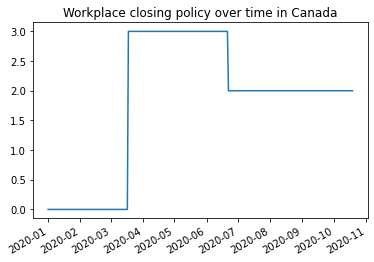

In [108]:
fig, ax = plt.subplots()
ax.plot(data_country['date'], data_country['workplace_closing'])
ax.set_title('Workplace closing policy over time in ' + selected_country)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

Visualizing the number of confirmed cases and deaths over time

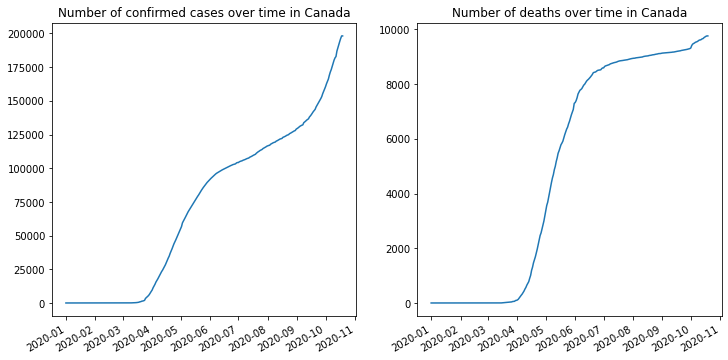

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(data_country['date'], data_country['confirmed'])
ax1.set_title('Number of confirmed cases over time in ' + selected_country)
ax2.plot(data_country['date'], data_country['deaths'])
ax2.set_title('Number of deaths over time in ' + selected_country)
fig.autofmt_xdate()

Calculating number of daily NEW cases and deaths

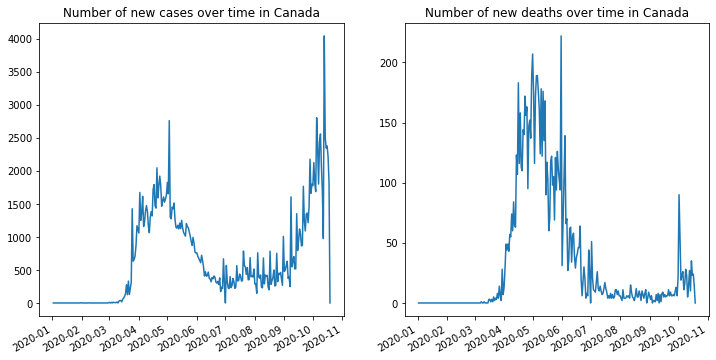

In [38]:
data_country.loc[:,'new_cases'] = data_country['confirmed'].diff()
data_country.loc[:,'new_deaths'] = data_country['deaths'].diff()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(data_country['date'], data_country['new_cases'])
ax1.set_title('Number of new cases over time in ' + selected_country)
ax2.plot(data_country['date'], data_country['new_deaths'])
ax2.set_title('Number of new deaths over time in ' + selected_country)
fig.autofmt_xdate()

Visualizing school closing policy in the selected country

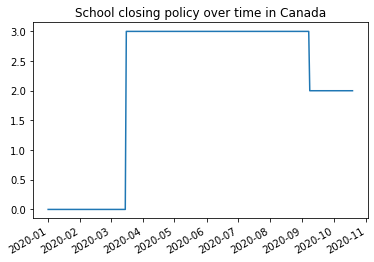

In [110]:
fig, ax = plt.subplots()
ax.plot(data_country['date'], data_country['school_closing'])
ax.set_title('School closing policy over time in ' + selected_country)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

Visualizing the effects of school closing policies on the number of confirmed cases

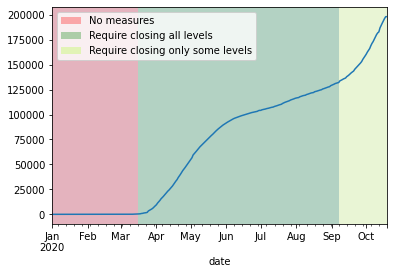

In [117]:
from matplotlib.patches import Patch
ax = data_country.plot(x='date', y='confirmed')
ax.pcolorfast(ax.get_xlim(), ax.get_ylim(),
              data_country['school_closing'].values[np.newaxis],
              cmap='RdYlGn', alpha=0.3)

legend_elements = [Patch(facecolor='red', edgecolor=None, alpha=0.3, label='No measures'),
                  Patch(facecolor='green', edgecolor=None, alpha=0.3, label='Require closing all levels'),
                  Patch(facecolor='greenyellow', edgecolor=None, alpha=0.3, label='Require closing only some levels')]

# Create the figure
#fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='upper left');

### Comparing two countries

In [39]:
selected_countries = ["Spain", "France"]

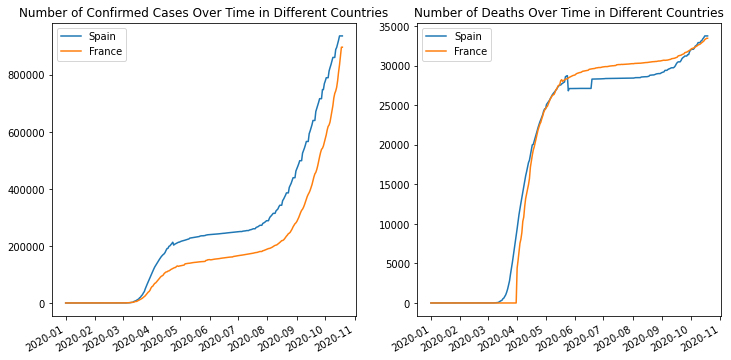

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for country in selected_countries:
    data_country_it = data1[data1.administrative_area_level_1 == country]
    ax1.plot(data_country_it['date'], data_country_it['confirmed'], label=country)
    ax1.set_title('Number of Confirmed Cases Over Time in Different Countries')
    ax2.plot(data_country_it['date'], data_country_it['deaths'], label=country)
    ax2.set_title('Number of Deaths Over Time in Different Countries')
fig.autofmt_xdate()
ax1.legend()
ax2.legend()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

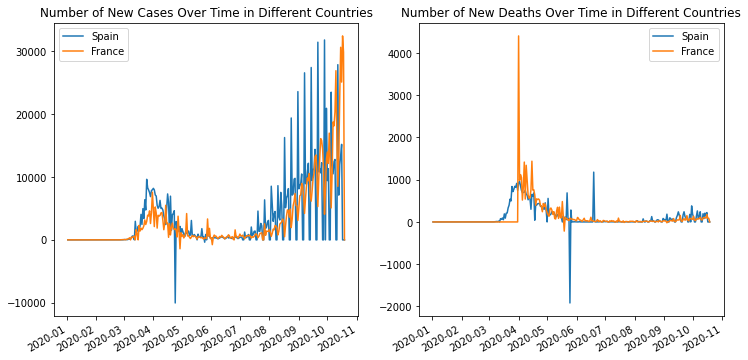

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for country in selected_countries:
    data_country_it = data1[data1.administrative_area_level_1 == country]
    data_country_it.loc[:,'new_cases'] = data_country_it['confirmed'].diff()
    data_country_it.loc[:,'new_deaths'] = data_country_it['deaths'].diff()
    ax1.plot(data_country_it['date'], data_country_it['new_cases'], label=country)
    ax1.set_title('Number of New Cases Over Time in Different Countries')
    ax2.plot(data_country_it['date'], data_country_it['new_deaths'], label=country)
    ax2.set_title('Number of New Deaths Over Time in Different Countries')
fig.autofmt_xdate()
ax1.legend()
ax2.legend()

Calculating differences over every 7 days to filter the data

In [91]:
data_country_it = data1[data1.administrative_area_level_1 == "Spain"]
period = 7
filtered_data = 
for np.arange(0, , period):
    data_country_it.loc[:,'new_cases'] = data_country_it['confirmed'].diff()
    data_country_it.loc[:,'new_deaths'] = data_country_it['deaths'].diff()
    ax1.plot(data_country_it['date'], data_country_it['new_cases'], label=country)
    ax1.set_title('Number of New Cases Over Time in Different Countries')

In [95]:
data_country_it = data1[data1.administrative_area_level_1 == "Spain"]
data_country_it.loc[:,'new_cases'] = data_country_it['confirmed'].diff(7)
data_country_it.loc[:,'new_deaths'] = data_country_it['deaths'].diff(7)

ax1.plot(data_country_it['date'], data_country_it['new_cases'], label=country)
ax1.set_title('Number of New Cases Over Time in Different Countries')
ax2.plot(data_country_it['date'], data_country_it['new_deaths'], label=country)
ax2.set_title('Number of New Deaths Over Time in Different Countries')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Text(0.5, 1.0, 'Number of New Deaths Over Time in Different Countries')

## Importing data for a different administrative level

Using data from the COVID19 Datahub, administrative level 3 in `.csv` format available at https://storage.covid19datahub.io/data-3.csv

In [48]:
data3 = pd.read_csv("./data/data-3.csv")
print(data3.shape)
print(data3.columns)
data3.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (32,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1483482, 37)
Index(['id', 'date', 'tests', 'confirmed', 'recovered', 'deaths', 'hosp',
       'vent', 'icu', 'population', 'school_closing', 'workplace_closing',
       'cancel_events', 'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'stringency_index', 'iso_alpha_3',
       'iso_alpha_2', 'iso_numeric', 'currency', 'administrative_area_level',
       'administrative_area_level_1', 'administrative_area_level_2',
       'administrative_area_level_3', 'latitude', 'longitude', 'key',
       'key_numeric', 'key_google_mobility', 'key_apple_mobility',
       'key_alpha_2'],
      dtype='object')


,id,date,tests,confirmed,recovered,deaths,hosp,vent,icu,population,...,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_numeric,key_google_mobility,key_apple_mobility,key_alpha_2
0,0007cb93,2020-01-21,0,0,0,0,0,0,0,5257.0,...,United States,Georgia,Schley,32.265402,-84.312589,NaN,13249.0,"Georgia, Schley County",NaN,NaN
1,0007cb93,2020-01-22,0,0,0,0,0,0,0,5257.0,...,United States,Georgia,Schley,32.265402,-84.312589,NaN,13249.0,"Georgia, Schley County",NaN,NaN
2,0007cb93,2020-01-23,0,0,0,0,0,0,0,5257.0,...,United States,Georgia,Schley,32.265402,-84.312589,NaN,13249.0,"Georgia, Schley County",NaN,NaN
3,0007cb93,2020-01-24,0,0,0,0,0,0,0,5257.0,...,United States,Georgia,Schley,32.265402,-84.312589,NaN,13249.0,"Georgia, Schley County",NaN,NaN
4,0007cb93,2020-01-25,0,0,0,0,0,0,0,5257.0,...,United States,Georgia,Schley,32.265402,-84.312589,NaN,13249.0,"Georgia, Schley County",NaN,NaN


In [62]:
# Converting dates to datetime format
data3['date'] = pd.to_datetime(data3['date'], format='%Y-%m-%d')

Viewing available administrative level 1

In [64]:
data3.administrative_area_level_1.unique()

array(['United States', 'Colombia', 'United Kingdom', 'Poland', 'Germany',
       'France', 'Italy', 'Czech Republic', 'Chile', 'Puerto Rico',
       'Spain'], dtype=object)

Viewing example administrative level 3 for a specific country

In [128]:
data3[data3.administrative_area_level_1 == "Germany"]['administrative_area_level_3'].unique()

array(['LK Freudenstadt', 'LK Waldshut', 'LK Nordwestmecklenburg',
       'LK Rheingau-Taunus-Kreis', 'LK Soest', 'LK Sigmaringen',
       'LK Siegen-Wittgenstein', 'LK Rheinisch-Bergischer Kreis',
       'SK Suhl', 'LK Görlitz', 'LK Waldeck-Frankenberg', 'LK Paderborn',
       'SK Berlin Steglitz-Zehlendorf', 'LK Heinsberg', 'LK Unna',
       'LK Main-Kinzig-Kreis', 'LK Wesel', 'LK Vogelsbergkreis',
       'SK Bremerhaven', 'LK Gießen', 'LK Mittelsachsen', 'LK Bergstraße',
       'LK Warendorf', 'LK Oberbergischer Kreis',
       'SK Berlin Friedrichshain-Kreuzberg', 'LK Fulda',
       'LK Minden-Lübbecke', 'LK Heidekreis', 'SK Delmenhorst',
       'LK Westerwaldkreis', 'LK Wolfenbüttel', 'LK Oldenburg',
       'SK Wilhelmshaven', 'SK Frankfurt (Oder)',
       'SK Berlin Reinickendorf', 'SK Braunschweig', 'LK Tuttlingen',
       'SK Dessau-Roßlau', 'LK Hildesheim', 'LK Lüchow-Dannenberg',
       'LK Helmstedt', 'SK Kaiserslautern', 'LK Schwäbisch Hall',
       'LK Emsland', 'SK Neustad

### Visualizing data for a specific city

Using Paris as an example

In [68]:
selected_city = "Paris"
data_city = data3[data3.administrative_area_level_3 == selected_city]
print(data_city.shape)
data_city.head()

(273, 37)


,id,date,tests,confirmed,recovered,deaths,hosp,vent,icu,population,...,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_numeric,key_google_mobility,key_apple_mobility,key_alpha_2
117117,1568931f,2020-01-21,0,0,0,0,0,0,0,NaN,...,France,NaN,Paris,NaN,NaN,DEP-75,NaN,NaN,NaN,NaN
117118,1568931f,2020-01-22,0,0,0,0,0,0,0,NaN,...,France,NaN,Paris,NaN,NaN,DEP-75,NaN,NaN,NaN,NaN
117119,1568931f,2020-01-23,0,0,0,0,0,0,0,NaN,...,France,NaN,Paris,NaN,NaN,DEP-75,NaN,NaN,NaN,NaN
117120,1568931f,2020-01-24,0,0,0,0,0,0,0,NaN,...,France,NaN,Paris,NaN,NaN,DEP-75,NaN,NaN,NaN,NaN
117121,1568931f,2020-01-25,0,0,0,0,0,0,0,NaN,...,France,NaN,Paris,NaN,NaN,DEP-75,NaN,NaN,NaN,NaN


Checking initial and final date of observations for a country

In [69]:
print(data_city.date.max() - data_city.date.min())
print(data_city.date.min())
print(data_city.date.max())

272 days 00:00:00
2020-01-21 00:00:00
2020-10-19 00:00:00


Visualizing how `school_closing` policy has changed thoughout the pandemic, where:
- 0: No measures 
- 1: Recommend closing (or work from home) 
- 2: require closing for some sectors or categories of workers 
- 3: require closing (or work from home) all-but-essential workplaces (eg grocery stores, doctors).

Visualizing school closing policy

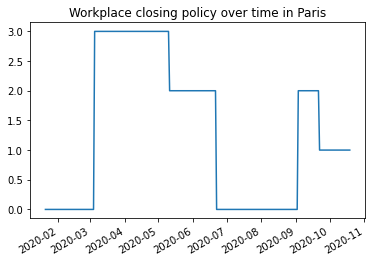

In [71]:
fig, ax = plt.subplots()
ax.plot(data_city['date'], data_city['school_closing'])
ax.set_title('Workplace closing policy over time in ' + selected_city)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

visualizing number of new cases and deaths

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


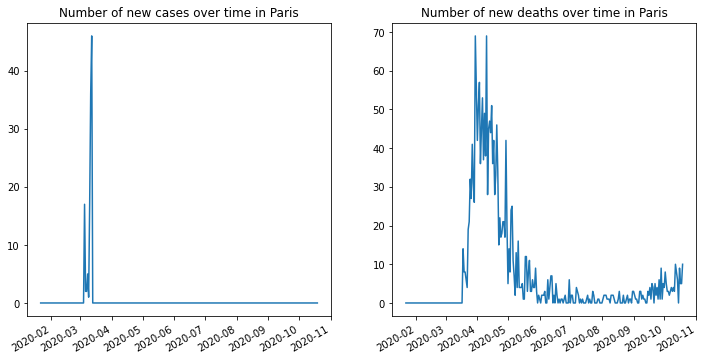

In [72]:
data_city.loc[:,'new_cases'] = data_city['confirmed'].diff()
data_city.loc[:,'new_deaths'] = data_city['deaths'].diff()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(data_city['date'], data_city['new_cases'])
ax1.set_title('Number of new cases over time in ' + selected_city)
ax2.plot(data_city['date'], data_city['new_deaths'])
ax2.set_title('Number of new deaths over time in ' + selected_city)
fig.autofmt_xdate()

### Selecting a different city 

In [132]:
selected_city = "Firenze"
selected_country = "Italy"
selected_city in data3.administrative_area_level_3.unique()

True

In [133]:
data_city = data3[np.logical_and(data3.administrative_area_level_3 == selected_city, data3.administrative_area_level_1 == selected_country)]
data_city["administrative_area_level_2"].unique()

array(['Toscana'], dtype=object)

(273, 37)


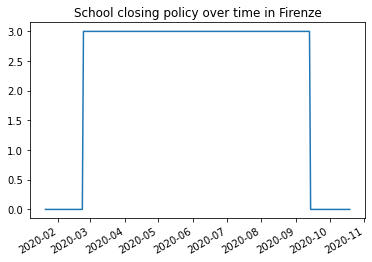

In [135]:
data_city.set_index('date')
data_city = data_city.sort_index()

print(data_city.shape)
fig, ax = plt.subplots()
ax.plot(data_city['date'], data_city['school_closing'])
ax.set_title('School closing policy over time in ' + selected_city)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Meeting

TODO
- Find place where school_closing policy changes ( 0-...-3 and then 3-0) 

DONE
- X axis date
- Number of cases / day (new cases)
- City level data

## REMEMBER

Country-level data seems more robust than city-level data. This should point towards using a country as a baseline instead of a city.